In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Text classification

The first example is based on trying to predict the tags on xenotheka based on their short description.

In [2]:
import json
with open('data/xenotheka.json', 'r') as f:
    data = json.load(f)

In [3]:
# Displaying the first element in the data
data[0]

{'url': 'https://xenotheka.delbeke.arch.ethz.ch/whiteley-reyner-banham-historian-of-the-immediate-future-2/',
 'title': 'Whiteley, Reyner Banham: Historian of the Immediate Future',
 'categories': ['_English Language',
  '20th Century',
  'Architectural Theory',
  'Modern',
  'Post-Modern',
  'Sources',
  'Urbanism'],
 'description': 'Reyner Banham (1922-88) was one of the most influential writers on architecture, design, and popular culture from the mid-1950s to the late 1980s. Trained in mechanical engineering and art history, he was convinced that technology was making society not only more exciting but more democratic. His combination of academic rigor and pop culture sensibility put him in opposition to both traditionalists and orthodox Modernists, but placed him in a unique position to understand the cultural, social, and political implications of the visual arts in the postwar period. His first book, Theory and Design in the First Machine Age (still in print with The MIT Press a

## Prepare the data

In [4]:
# Input data, list of descriptions
data_X = [d['description'] for d in data]
# First two elements
data_X[:2]

['Reyner Banham (1922-88) was one of the most influential writers on architecture, design, and popular culture from the mid-1950s to the late 1980s. Trained in mechanical engineering and art history, he was convinced that technology was making society not only more exciting but more democratic. His combination of academic rigor and pop culture sensibility put him in opposition to both traditionalists and orthodox Modernists, but placed him in a unique position to understand the cultural, social, and political implications of the visual arts in the postwar period. His first book, Theory and Design in the First Machine Age (still in print with The MIT Press after forty years), was central to the overhaul of Modernism, and it gave Futurism and Expressionism credibility amid the dynamism and change of the 1960s.This intellectual biography is the first comprehensive critical examination of Banham’s theories and ideas, not only on architecture but also on the wide variety of subjects that in

In [5]:
# Output data, list of categories
data_Y = [d['categories'] for d in data]
# First two elements
data_Y[:2]

[['_English Language',
  '20th Century',
  'Architectural Theory',
  'Modern',
  'Post-Modern',
  'Sources',
  'Urbanism'],
 ['_English Language', 'Philosophy']]

### Preparing output data

In [6]:
from collections import Counter
# Counting the number of occurences in each categories
counts_dict = Counter(t for tags in data_Y for t in tags)
counts_dict.most_common()

[('_English Language', 644),
 ('Architectural Theory', 195),
 ('20th Century', 141),
 ('Rome', 110),
 ('Philosophy', 96),
 ('Art Theory', 90),
 ('17th Century', 76),
 ('Italy', 75),
 ('Renaissance', 73),
 ('21th Century', 68),
 ('1750-1850', 63),
 ('Uncategorized', 62),
 ('Literary Theory', 56),
 ('Portrait, Sculpture, Materiality', 55),
 ('Sources', 53),
 ('_Italian Language', 53),
 ('Urbanism', 47),
 ('19th century', 45),
 ('_French Language', 44),
 ('City', 42),
 ('_Latin Language', 42),
 ('France', 42),
 ('Modern', 41),
 ('Drawings', 38),
 ('Politics', 34),
 ('Architecture + Philosophy', 28),
 ('Architecture and Literature, Symbolism', 28),
 ('Literature', 28),
 ('Historiography', 28),
 ('Design', 27),
 ('Monuments + Conservation', 27),
 ('Popes, Vatican, Rome', 27),
 ('England & British Isles', 23),
 ('_German Language', 22),
 ('Science', 22),
 ('Artists in Rome', 20),
 ('Post-Modern', 19),
 ('Bernini', 19),
 ('Roman Architecture', 18),
 ('Christian Iconography', 18),
 ('Low Count

In [7]:
# Keeping the categories that appear at least 5% of the time
kept_categories = [cat for cat, count in counts_dict.most_common() if count >= 0.05*len(data_Y)]
print(kept_categories)

['_English Language', 'Architectural Theory', '20th Century', 'Rome', 'Philosophy', 'Art Theory', '17th Century', 'Italy', 'Renaissance', '21th Century', '1750-1850', 'Uncategorized', 'Literary Theory', 'Portrait, Sculpture, Materiality', 'Sources', '_Italian Language', 'Urbanism', '19th century', '_French Language', 'City', '_Latin Language', 'France', 'Modern']


#### Converting output labels to indices

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer
classes_encoder = MultiLabelBinarizer(kept_categories)
# We will get a warning message as we ignore unfrequent classes
data_Y_idx = classes_encoder.fit_transform(data_Y)

/home/benoit/miniconda3/envs/dig/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:987: UserWarning: unknown class(es) ['17th culture and other cities in Italy', 'Architecture + Philosophy', 'Architecture and Literature, Symbolism', 'Artists in Rome', 'Bernini', 'Christian Iconography', 'Design', 'Digital Architectonics', 'Drawings', 'Economy', 'Empire, Architecture + Catholicism', 'England & British Isles', 'Evolution', 'Gothic', 'Historiography', 'Humanism', 'India', 'Landscape Architecture', 'Literature', 'Low Countries (Benelux)', 'Mathematics', 'Monuments + Conservation', 'Mythology', 'Physics', 'Politics', 'Popes, Vatican, Rome', 'Post-Modern', 'Psychology', 'Roman Architecture', 'Schinkel', 'Science', 'Spain', '_German Language'] will be ignored
  .format(sorted(unknown, key=str)))


In [9]:
# Original data
print(data_Y[:2])
# Binary encoding version, each row is a sample, each column is a type of label (1: present, 0: absent)
print(data_Y_idx[:2])
# Converting back to human readable format
print(classes_encoder.inverse_transform(data_Y_idx[:2]))

[['_English Language', '20th Century', 'Architectural Theory', 'Modern', 'Post-Modern', 'Sources', 'Urbanism'], ['_English Language', 'Philosophy']]
[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[('_English Language', 'Architectural Theory', '20th Century', 'Sources', 'Urbanism', 'Modern'), ('_English Language', 'Philosophy')]


### Splitting the data in training and testing

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y_idx, train_size=0.8, random_state=42)

print('Total samples : ', len(data_X))
print('Training samples : ', len(X_train))
print('Testing samples : ', len(X_test))

Total samples :  798
Training samples :  638
Testing samples :  160


## Training a model

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Object to transform text to a vector (tf-idf which is a version of Bag-of-Words representation)
txt_encoder = TfidfVectorizer()


from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
# Classifier object 
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True))


from sklearn.pipeline import Pipeline
# Full pipeline consisting of both operations
pipeline = Pipeline([('vectorizer', txt_encoder), ('classifier', classifier)])


# Do the training !
print('Training started')
pipeline.fit(X_train, Y_train)
print('Training done')

Training started
Training done


In [12]:
Y_pred_test = pipeline.predict_proba(X_test)
for i in range(10):
    print(X_test[i])
    print("Actual labels : ", classes_encoder.inverse_transform(Y_test[i:i+1]))
    print("Predicted labels : ")
    # Printing the 5 classes with the higher probabilities
    top_classes_id = reversed(np.argsort(Y_pred_test[i])[-5:])
    for class_id in top_classes_id:
        print(f"{100*Y_pred_test[i][class_id]:.01f}% : {classes_encoder.classes[class_id]}")
    print('----')

Inigo Jones, the first English classical architect, was famous in his own time and was the posthumous sponsor of the Palladian movement of the eighteenth century. This authoritative and elegantly written book, first published in 1966, reassessed Jones’s life and career, cleared away the myths of attribution that surround his work, and reassigned to him projects that had disappeared from his oeuvre. Summerson’s classic text is enhanced by a new foreword and notes by Howard Colvin, updated bibliography, and improved illustrations.
Actual labels :  [('_English Language', '17th Century', 'Renaissance')]
Predicted labels : 
96.7% : _English Language
48.4% : Architectural Theory
18.6% : 20th Century
10.0% : 17th Century
9.9% : Italy
----
Giovanni Pietro Bellori was one of the most important intellectuals of seventeenth-century Italy. Although best known today for his art criticism and biographies of artists he knew personally, he was also renowned for his knowledge of coins, gems, and ancien

In [13]:
from sklearn import metrics
Y_pred_test = (pipeline.predict_proba(X_test) > 0.1)
r = metrics.classification_report(Y_test, Y_pred_test, target_names=classes_encoder.classes_)
print(r)

                                  precision    recall  f1-score   support

               _English Language       0.99      1.00      0.99       132
            Architectural Theory       0.34      0.97      0.50        36
                    20th Century       0.31      0.83      0.45        29
                            Rome       0.43      0.87      0.57        23
                      Philosophy       0.41      0.89      0.57        19
                      Art Theory       0.27      0.75      0.40        20
                    17th Century       0.33      0.74      0.45        19
                           Italy       0.31      0.52      0.39        21
                     Renaissance       0.23      0.58      0.33        12
                    21th Century       0.24      0.80      0.36        10
                       1750-1850       0.23      0.50      0.31        10
                   Uncategorized       0.05      0.09      0.07        11
                 Literary Theory     

/home/benoit/miniconda3/envs/dig/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Classification on images, with pre-trained CNNs

In this example, we are looking at predicting if an art image is a representation of a traditional 'Madonna and Child' composition.

For this, there are three folders containing images in the `data` folder:
- `madonna` which contains images of what we are looking for
- `random` which contains images of random artworks
- `test` which contains unseen images for us to try our model on

### Loading images

In [14]:
from glob import glob
from PIL import Image

def load_images(path):
    """Loading images according to a glob-like path"""
    results = []
    for filename in glob(path):
        results.append(Image.open(filename))
    return results

In [15]:
# Gather the image files in each directory
madonna_images = load_images('data/images/madonna/*.jpg')
print("Number of training positive files : {}".format(len(madonna_images)))
random_images = load_images('data/images/random/*.jpg')
print("Number of training negative files : {}".format(len(random_images)))
test_images = load_images('data/images/test/*.jpg')
print("Number of test files : {}".format(len(test_images)))

Number of training positive files : 17
Number of training negative files : 52
Number of test files : 12


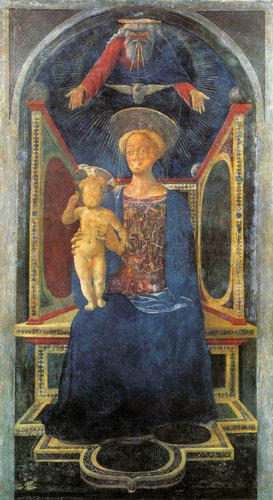

In [16]:
madonna_images[0]

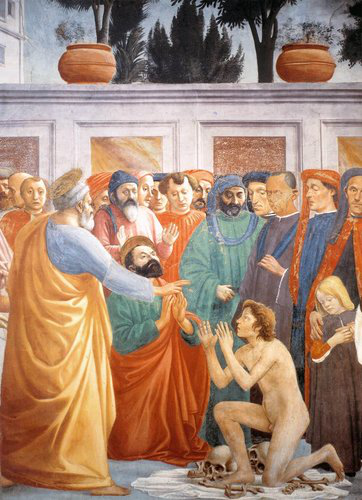

In [17]:
random_images[0]

### Preparing training data

In [18]:
X = []
Y = []
X_test = []
for img in madonna_images:
    X.append(img)
    Y.append(1.)
for img in random_images:
    X.append(img)
    Y.append(0.)
for img in test_images:
    X_test.append(img)
    
# Input data is a list of images (only printing the first 10)
print(X[:10])
# Target (output) data is a list of labels
print(Y)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=273x500 at 0x7F468C4E0E50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=235x500 at 0x7F468C558B50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=357x500 at 0x7F468C544990>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=335x500 at 0x7F468C544A90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=313x500 at 0x7F468C544B90>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=287x500 at 0x7F468C544CD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=399x500 at 0x7F468C544DD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=344x500 at 0x7F468C544ED0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=408x500 at 0x7F468C544FD0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=394x500 at 0x7F468C544C90>]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

### Extracting CNN features

In [19]:
# Load Keras
import keras
# Import the Inception network which is a neural network architecture developped by Google (http://arxiv.org/abs/1512.00567)
from keras.applications import inception_v3

Using TensorFlow backend.
/home/benoit/miniconda3/envs/dig/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/benoit/miniconda3/envs/dig/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/benoit/miniconda3/envs/dig/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/benoit/miniconda3/en

In [20]:
# Instantiate the architecture, with pre-trained parameters from ImageNet
# but without the final (top) layer of object classification
# and averaging (avg) the output feature maps to get a constant size feature vector
model = inception_v3.InceptionV3(include_top=False, pooling='avg', weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
def extract_cnn_features(img):
    x = np.expand_dims(np.asarray(img).astype(np.float32), axis=0)  # Make a batch of 1 image by expanding the first dimension
    x = inception_v3.preprocess_input(x)  # Preprocess the input image ([0,255] range to [-1,+1])
    return model.predict(x)[0]  # Make the batch goes through the network and convert the batch back to single image

In [22]:
extract_cnn_features(madonna_images[0])

array([0.4846895 , 0.02819905, 0.01363451, ..., 0.039473  , 0.25822338,
       0.6776815 ], dtype=float32)

## Training a Classifier on top of CNN-features

In [23]:
from sklearn.preprocessing import FunctionTransformer
from tqdm.auto import tqdm

def extract_cnn_features_many_images(images):
    features = [extract_cnn_features(img) for img in tqdm(images, desc="Extracting features")]
    return np.stack(features)

# Object that converts an image to a vector
img_vectorizer = FunctionTransformer(extract_cnn_features_many_images)
# Classifier object
classifier = SVC(kernel='linear', probability=True)

# Full pipeline consisting of both operations
pipeline = Pipeline([('vectorizer', img_vectorizer), ('classifier', classifier)])

# Do the training !
print('Training started')
pipeline.fit(X, Y)
print('Training done')

Training started



Training done


In [24]:
predictions = pipeline.predict_proba(test_images)

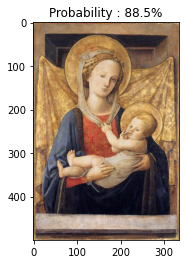

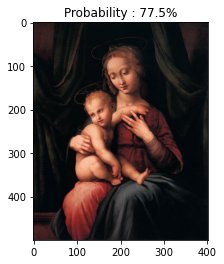

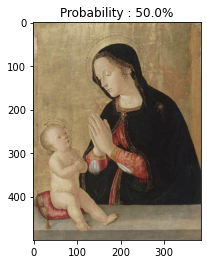

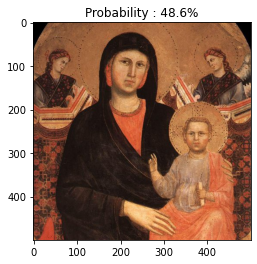

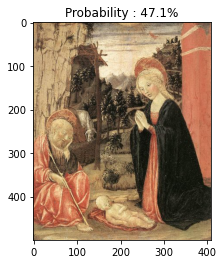

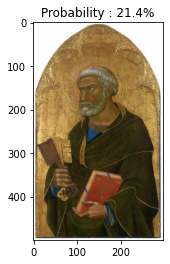

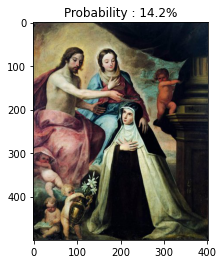

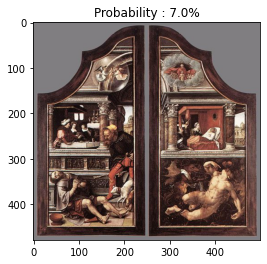

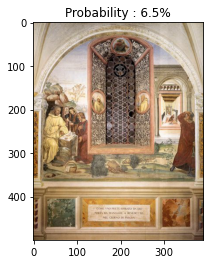

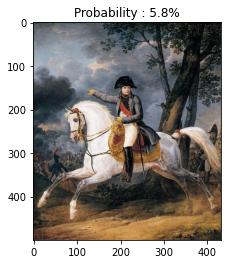

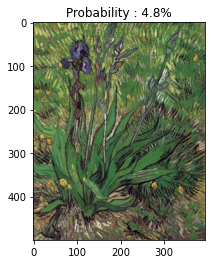

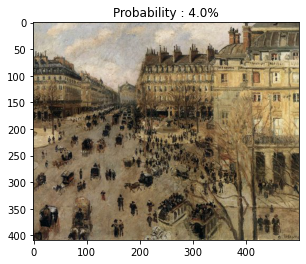

In [25]:
for img, probs in sorted(zip(test_images, predictions), key=lambda s: s[1][0]):
    plt.figure()
    plt.imshow(np.asarray(img))
    # Display the probability of class 1 (i.e madonna)
    plt.title("Probability : {:.01f}%".format(100*probs[1]))